# REGRESIÓN LINEAL

## Modelo: KEYNESIANO

## Paso 1: Ingresar datos y realizar gŕafico de dispersión.

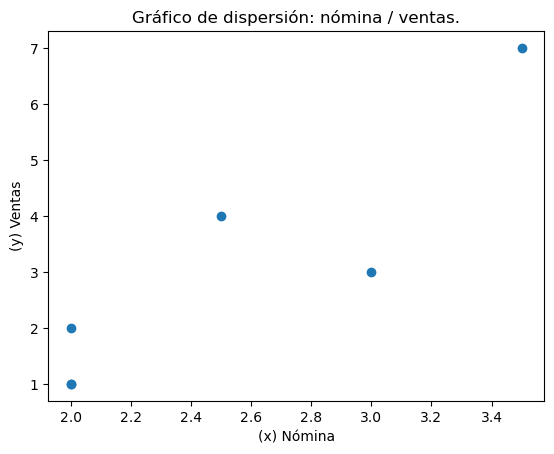

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2,3,2.5,2,2,3.5])
y = np.array([1,3,4,2,1,7])
eje_x = input('Ingrese el nombre de la variable x: ')
eje_y = input('Ingrese el nombre de la variable y: ')

plt.title('Gráfico de dispersión: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.scatter(x, y) #gráfico de dispersión
plt.show() #for clean output

## Paso 2: Calcular e interpretar el coeficiente de correlación (r).

In [12]:
###---calculo de coeficiente de correlación (r)---###

#mean_x = media de elementos en x
#mean_y = media de elementos en y
#std_x = desviación std. de elementos en x
#std_y = desviación std. de elementos en y
#dispersion_x = dispersion con respecto a la media de elementos en x (x - mean_x)
#dispersion_y = dispersion con respecto a la media de elementos en y (y - mean_y)

mean_x, mean_y = np.mean(x), np.mean(y)
std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)
dispersion_x, dispersion_y = x - mean_x, y - mean_y

numerador_r = sum(dispersion_x * dispersion_y)
denominador_r = ((len(x)) - 1) * std_x * std_y
#print(numerador_r)
#print(denominador_r)

r = numerador_r / denominador_r
print('r = {:.2f}'.format(r))

###---interpretación de coeficiente de correlación (r)---###

if r > 0:
    if r > 0.5:
        print('Existe una correlación positiva fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación positiva débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
elif r < 0:
    if r < -0.5:
        print('Existe una correlación negativa fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
    else:
        print('Existe una correlación negativa débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
else:
    print('No existe ninguna correlación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))

r = 0.90
Existe una correlación positiva fuerte entre nómina y ventas.


## (verificar)Paso 3: Hallar la ecuación y la recta de la regresión lineal.

In [13]:
#formula pendiente
pendiente = r * (std_y / std_x)
print('La pendiente de la recta de regresión es: {:.2f}.'.format(pendiente))

#formula intersección
interseccion = mean_y - (pendiente * mean_x)
print('La interseccion de la recta con el eje y ocurre en el punto: (0,{:.2f})'.format(interseccion))

#ecuación de la recta
print('La ecuación de la recta es Y = {:.2f} + {:.2f}X'.format(interseccion, pendiente))

La pendiente de la recta de regresión es: 3.25.
La interseccion de la recta con el eje y ocurre en el punto: (0,-5.12)
La ecuación de la recta es Y = -5.12 + 3.25X


## Paso 4: Grafica de la recta de la regresión lineal.

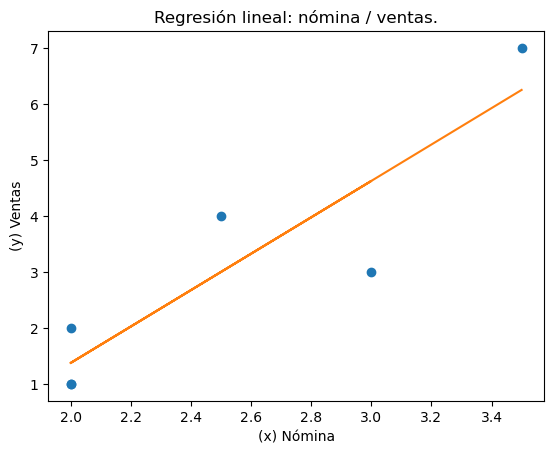

In [14]:
#create basic scatterplot
plt.plot(x, y, 'o') #'o' is for dots; 'ro' is for red dots

#add linear regression line to scatterplot 
plt.title('Regresión lineal: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.plot(x, pendiente*x+interseccion) #y=m*x+b
plt.show() #for clean output

## Paso 5: Estimación.

Se estima que por cada 6 llamadas realizadas, sean vendidas 35.55 copiadoras según la regresión lineal.


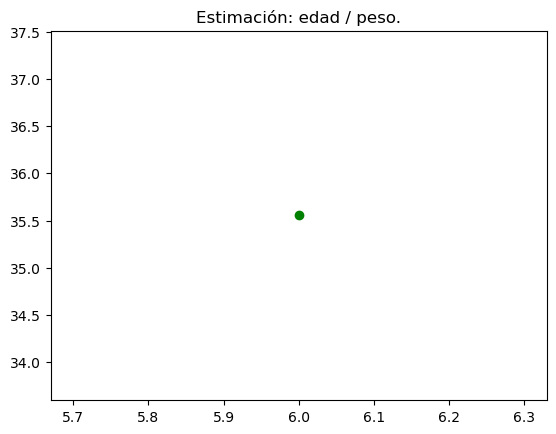

In [10]:
def estimar_valor():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = int(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * x_estimado) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('Se estima que por cada {} llamadas realizadas, sean vendidas {:.2f} copiadoras según la regresión lineal.'.format(x_estimado, y_estimado))

    x = np.array(x)
    y = np.array(y)

    #Gráfico
    plt.title('Estimación: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
    plt.plot(x, y, 'go') #'o' is for dots; 'ro' is for red dots

estimar_valor()